### Setup Cell

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time
import os
from scipy.io import loadmat
from dpc import DPClustering
from dbscan import MyDBSCAN
from sklearn.neighbors import KernelDensity

def expand_with_kde_keep_original(X, n_new, bandwidth=1.0, random_state=None):
    """
    Returns an array with X plus (factor-1)*len(X) new points
    sampled from a global KDE fit to X.
    """
    kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth)
    kde.fit(X)
    
    X_new = kde.sample(n_new, random_state=random_state)
    
    return X_new

## Sanity Check

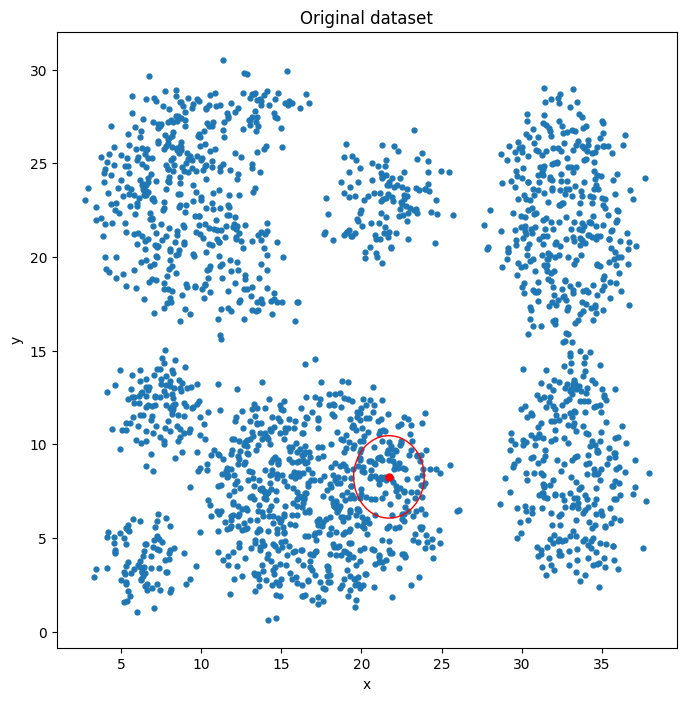

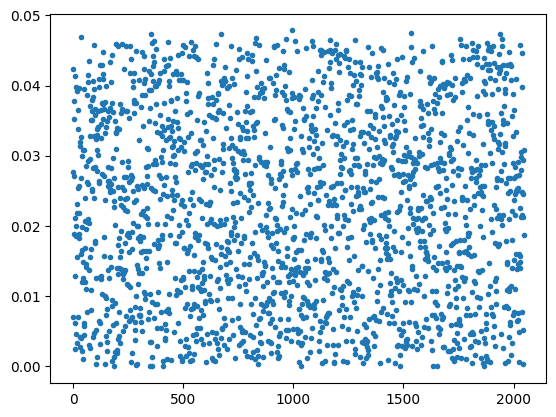

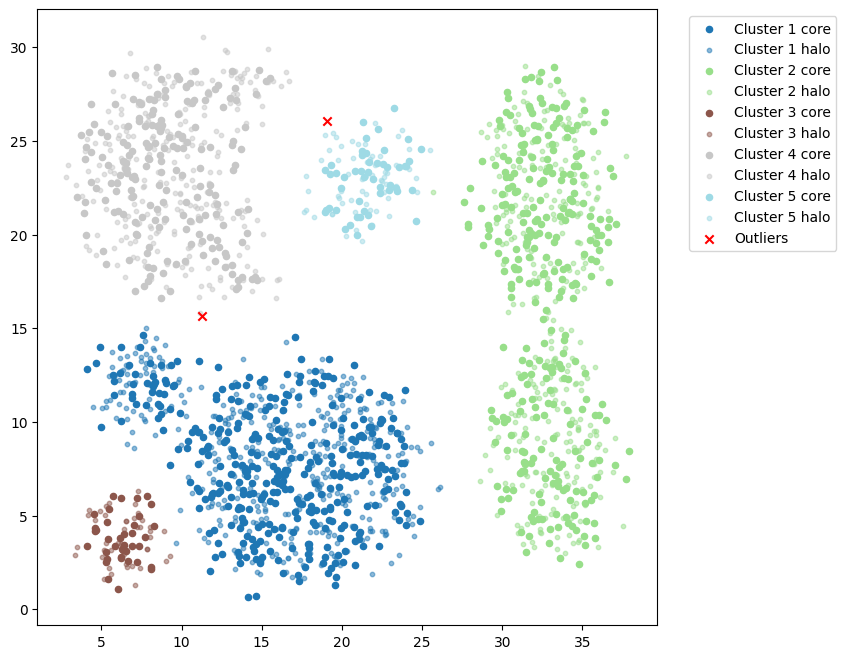

In [44]:
#Synthetic datasets
dataset_name = 'Aggregation'  #@param ["Compound", "Agreggation", "Spiral", "Flame", "R15", "2circles_noise", "banana", "2spiral", "Jain", "zelink1"]

mat = loadmat(r"C:/Users/gbs77/Desktop/Estudo/Investigação/DPC_worklab/datasets/{}.mat".format(dataset_name))
matrix_og = mat["data"]

#dataset generation parameters
N = 2**11 #number of elements in the new dataset
bandwidth = 0.8 #standard deviation for the gaussian kernel
random_state = 0 #random state for reproducibility
#DBSCAN (modified) parameters
eps = 2.2
rho_c = 0.025
prec = 2**-0

#generate dataset with the desired number of elements
matrix = expand_with_kde_keep_original(matrix_og, N, bandwidth=bandwidth,random_state=random_state)
#plot otiginal dataset and a circle of radius dc around a random point
from matplotlib.patches import Circle
plt.figure(figsize=[8,8])
plt.title('Original dataset')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(matrix[:,0],matrix[:,1],'.',markersize=7)
plt.plot(matrix[1,0],matrix[1,1],'.',markersize=10,color='red')
ax = plt.gca() #get the current axes
circle = Circle((matrix[1,0], matrix[1,1]), radius=eps, fill=False, 
                color='red', linestyle='-',zorder=4)
ax.add_patch(circle) #add patch to the axes
plt.show()



dbscan = MyDBSCAN(matrix)
dbscan.densities(eps)
rhos = dbscan.adjust_density_precision(prec)
plt.plot(rhos,'.')
plt.show()
roles = dbscan.roles(rho_c)
labels = dbscan.fit()
dbscan.plot_clusters(plot_roles=True)